## 实验：图像像素值统计与归一化

### 实验概要

#### 像素值统计

我们将数字图像理解成一定尺寸的矩阵，矩阵中每个元素的大小表示了图像中每个像素的明暗程度。因此，对图像像素值进行统计，其应用意义在于：

- 统计矩阵中的最大值，就是寻找图像中灰度值最大的像素
- 计算平均值就是计算图像像素平均灰度，可以用来表示图像整体的亮暗程度。

在 OpenCV 中集成了求取图像像素最大值、最小值、平均值、均方差等众多统计量的函数。

#### 像素值归一化

对于像素值归一化而言，就是要把图片像素值数据经过某种算法限制在需要的一定范围内。归一化可以使没有可比性的数据变得具有可比性，同时保持相比较的数据之间的相对关系。归一化首先是为了后面数据处理的方便，其次是保证程序运行时收敛加快。

### 实验目标

在本实验中，我们将对示例图像像素值实现基本统计与归一化。

### 1. 导入 OpenCV

In [1]:
import cv2
import numpy as np

# 加载matplotlib.pyplot进行图像显示
import matplotlib.pyplot as plt

# 魔法指令，是图像直接嵌入Jupyter Notebook显示
%matplotlib inline

### 2. 加载图像并显示灰度图

[[23 24 22 ... 47 45 43]
 [30 26 24 ... 47 45 43]
 [32 23 21 ... 46 45 43]
 ...
 [41 41 39 ... 55 60 53]
 [33 33 34 ... 78 76 63]
 [36 35 36 ... 81 76 62]]
[[[34 29  8]
  [35 30  9]
  [34 27  7]
  ...
  [61 51 34]
  [59 49 32]
  [57 47 30]]

 [[41 36 15]
  [37 32 11]
  [35 30  9]
  ...
  [61 51 34]
  [59 49 32]
  [57 47 30]]

 [[41 38 17]
  [32 29  8]
  [30 27  6]
  ...
  [60 50 33]
  [59 49 32]
  [57 47 30]]

 ...

 [[43 47 28]
  [43 47 28]
  [41 46 25]
  ...
  [51 64 40]
  [58 69 43]
  [51 62 36]]

 [[35 39 20]
  [35 39 20]
  [36 41 20]
  ...
  [73 87 63]
  [71 86 59]
  [58 73 46]]

 [[38 42 23]
  [37 41 22]
  [38 43 22]
  ...
  [74 90 66]
  [69 86 59]
  [55 72 45]]]


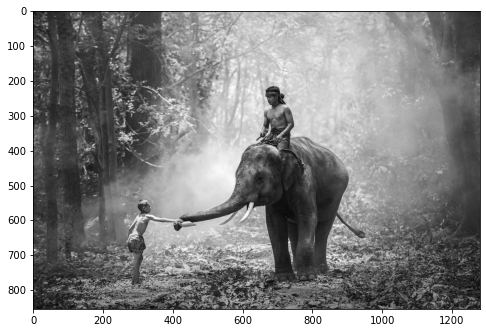

In [4]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab1/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 直接采用灰度模型读取图像
# 是直接改变了矩阵

src = cv2.imread("./data/elephant.jpg", 
                 cv2.IMREAD_GRAYSCALE) 
print(src)
src1 = cv2.imread("./data/elephant.jpg",) 
print(src1)
# 设置画布尺寸
plt.figure(figsize=(8,10))                       
# 喷涂灰度显示
plt.imshow(src, cmap="gray")                     

# 显示图像
plt.show()

我们拷贝一个副本执行统计操作：

In [3]:
src1=src.copy() # 拷贝副本

### 3. 图像像素最大值与最小值

OpenCV 提供了寻找图像像素最大值、最小值的函数 `minMaxLoc()`，将需要寻找最大值和最小值的图像或者矩阵输入函数，要求必须是单通道矩阵。

函数的返回值包括：

- **minVal**：返回值，图像或者矩阵中的最小值。
- **maxVal**：返回值，图像或者矩阵中的最大值。
- **minLoc**：返回值，图像或者矩阵中的最小值在矩阵中的坐标。
- **maxLoc**：返回值，图像或者矩阵中的最大值在矩阵中的坐标。

我们之前已经将图片转换为单通道灰度图，可以直接输入函数统计：

In [5]:
# 将需要寻找最大值和最小值的图像或者矩阵输入函数
min, max, minLoc, maxLoc = cv2.minMaxLoc(src)
print("min: %.2f, max: %.2f"% (min, max))
print("min loc: ", minLoc)
print("max loc: ", maxLoc)

min,max,minLoc,maxLoc = cv2.minMaxLoc(src)
print(f"min: {min} | max:{max}")
print(f"min loc: {minLoc}")
print(f"max loc: {maxLoc}")

min: 0.00, max: 255.00
min loc:  (674, 228)
max loc:  (528, 98)
min: 0.0 | max:255.0
min loc: (674, 228)
max loc: (528, 98)


$\uparrow$ 可以看到：

- 图像像素最小值为 `0.00`，位置坐标为 (674, 228)
- 图像像素最大值为 `255.00`，位置坐标为 (528, 98)

注意：`min loc` 和 `max loc` 的数据类型是 **Point**，该数据类型是用于表示图像的像素坐标，由于图像的像素坐标轴以 **左上角** 为 **坐标原点**，水平方向为 `X` 轴，垂直方向为 `Y` 轴，因此 $Point(x,y)$ 对应于图像的行和列表示为 $Point(列数，行数)$。

在 OpenCV 中对于二维坐标和三维坐标都设置了多种数据类型：

- 针对二维坐标数据类型定义了整型坐标 `cv::Point2i` (或者 `cv::Point` )、double 型坐标 `cv::Point2d`、浮点型坐标 `cv::Point2f`，
- 对于三维坐标同样定义了上述的坐标数据类型，只需要将其中的数字 `2` 变成 `3` 即可。
- 对于坐标中 x、y、z 轴的具体数据，可以通过变量的 x、y、z 属性进行访问，例如：`Point.x` 可以读取坐标的 x 轴数据。

### 4. 图像均值和标准方差

- 图像的均值表示图像整体的亮暗程度，图像的均值越大图像整体越亮。
- 图像的标准方差表示图像中明暗变化的对比程度，图像的标准差越大表示图像中明暗变化越明显。

OpenCV 提供了 `mean()` 函数用于计算图像每个通道的平均值的平均值，提供了 `meanStdDev()`函数用于同时计算图像的均值和标准方差。

In [10]:
print(src)
# src_rgb = cv2.imread("./data/elephant.jpg") 
# print(src_rgb)
means, stddev = cv2.meanStdDev(src)
# 输出均值与标准方差
print("mean: %.2f, stddev: %.2f"% (means, stddev))
# means, stddev = cv2.meanStdDev(src_rgb) 只支持输入单通道 ！ 多通道输入时会报错
# 输出均值与标准方差
# print("mean: %.2f, stddev: %.2f"% (means, stddev))

[[23 24 22 ... 47 45 43]
 [30 26 24 ... 47 45 43]
 [32 23 21 ... 46 45 43]
 ...
 [41 41 39 ... 55 60 53]
 [33 33 34 ... 78 76 63]
 [36 35 36 ... 81 76 62]]
mean: 121.77, stddev: 61.41


我们可以通过对以均值作为一个阈值，修改图像像素值。如此一来便可以可视化图像上哪些区域的像素大于均值，哪些区域的像素小于均值。

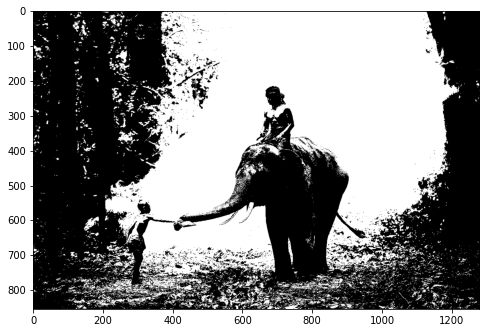

In [6]:
# 将小于均值的像素设置为 0
# np.where 函数返回满足条件元素的坐标（索引）
src1[np.where(src < means)] = 0

# np.where 函数返回满足条件元素的坐标（索引）
# 将大于均值的像素设置为 255
src1[np.where(src > means)] = 255

# 设置画布尺寸
plt.figure(figsize=(8,10))                       
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(src1, cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

### 5. 图像像素值归一化

OpenCV 通过 `cv2.normalize` 函数实现图像像素值归一化，完整说明请 [查阅官方文档](https://docs.opencv.org/4.2.0/d2/de8/group__core__array.html#gad12cefbcb5291cf958a85b4b67b6149f)，代码示例如下：

```python
normalize(src, dst, alpha=1, doublebeta=0, norm_type=NORM_L2, dtype=-1, mask=noArray() )
```
**参数说明**

- **src：** 输入数组
- **dst：** 输出数组，数组的大小和原数组一致；支持原地运算
- **alpha：** 如果 norm_type 为 NORM_MINMAX ，则 alpha 为最小值或最大值；如果 norm_type 为其他类型，则为归一化要乘的系数
- **beta：** 如果 norm_type 为 NORM_MINMAX ，则 beta 为最小值或最大值；如果 norm_type 为其他类型，beta 被忽略，此处不会被用到，一般传入0
- **norm_Type：** 归一化的类型，OpenCV 4 定义了以下九种类型的归一化类型：
  - *NORM_INF*：归一化数组的 C-范数 (绝对值的最大值)
  - *NORM_L1*：归一化数组的 L1-范数 (曼哈顿距离绝对值的和)
  - *NORM_L2*：归一化数组的 (欧几里德) L2-范数
  - *NORM_L2SQR*：平方欧几里得范数
  - *NORM_HAMMING*：对于一个输入数组，计算数组与零的汉明距离，对于两个输入数组，计算数组之间的汉明距离
  - *NORM_HAMMING2*：类似于 NORM_HAMMING，但在计算中，两个输入序列的每位都将被添加，并作为单独的位处理
  - *NORM_TYPE_MASK*：位掩码，可用于分隔规范类型和规范标志
  - *NORM_RELATIVE*：
  - *NORM_MINMAX*：数组的数值被平移或缩放到一个指定的范围，线性归一化，一般较常用。
- **dtype：** dtype 为负数时，输出数组的类型与输入数组的类型，即：大小、深度、通道数都相同；否则，输出数组与输入数组只是通道数相同，其余地方由 tpye 决定。
- **mask：** 操作掩膜，选择感兴趣区域，选定后只能对该区域进行操作。

执行归一化前，首先将图像转换为浮点类数组：

In [7]:
# 转换为浮点数类型数组
src = np.float32(src)
print(src)

[[23. 24. 22. ... 47. 45. 43.]
 [30. 26. 24. ... 47. 45. 43.]
 [32. 23. 21. ... 46. 45. 43.]
 ...
 [41. 41. 39. ... 55. 60. 53.]
 [33. 33. 34. ... 78. 76. 63.]
 [36. 35. 36. ... 81. 76. 62.]]


#### 5.1 NORM_MINMAX 归一化

设数组中原有 ${A1,A2,A3...An}$：

$$
P=\frac{A_{k}}{\max \left(A_{i}\right)-\min \left(A_{i}\right)}
$$

注：$A_{k}$ 不属于 ${max(A_{i})}$，${min(A_{i})}$，当 $A_{k}$ 等于 ${max(A_{i})}$ 时，$P=1$；等于 ${min(A_{i})}$ 时，$P=0$

[[0.09019608 0.09411766 0.08627451 ... 0.18431373 0.1764706  0.16862746]
 [0.11764707 0.10196079 0.09411766 ... 0.18431373 0.1764706  0.16862746]
 [0.1254902  0.09019608 0.08235294 ... 0.18039216 0.1764706  0.16862746]
 ...
 [0.16078432 0.16078432 0.15294118 ... 0.21568629 0.23529413 0.20784315]
 [0.12941177 0.12941177 0.13333334 ... 0.30588236 0.29803923 0.24705884]
 [0.14117648 0.13725491 0.14117648 ... 0.31764707 0.29803923 0.24313727]]


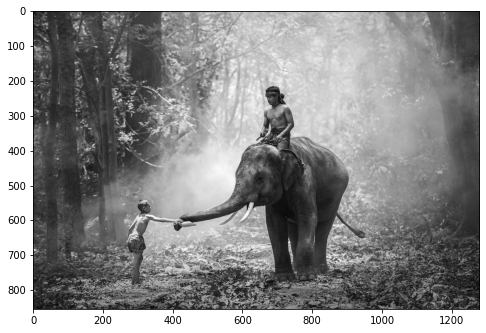

In [8]:
# 按 NORM_MINMAX 缩放和位移
dst_NORM_MINMAX = np.zeros(src.shape, dtype=np.float32)
cv2.normalize(src, dst=dst_NORM_MINMAX, alpha=0, 
              beta=1.0, norm_type=cv2.NORM_MINMAX)
print(dst_NORM_MINMAX)

plt.figure(figsize=(8,10)) # 设置画布尺寸
# 将图像转换为 RGB 模式显示 
# 将数组转换为uint8格式
plt.imshow(cv2.cvtColor(np.uint8(dst_NORM_MINMAX*255), cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

#### 5.2 NORM_INF 归一化

设数组中原有 ${A1,A2,A3...An}$：

$$
P=\frac{A_{i}}{\max \left(A_{i}\right)}
$$

[[0.09019608 0.09411766 0.08627451 ... 0.18431373 0.1764706  0.16862746]
 [0.11764707 0.10196079 0.09411766 ... 0.18431373 0.1764706  0.16862746]
 [0.1254902  0.09019608 0.08235294 ... 0.18039216 0.1764706  0.16862746]
 ...
 [0.16078432 0.16078432 0.15294118 ... 0.21568629 0.23529413 0.20784315]
 [0.12941177 0.12941177 0.13333334 ... 0.30588236 0.29803923 0.24705884]
 [0.14117648 0.13725491 0.14117648 ... 0.31764707 0.29803923 0.24313727]]


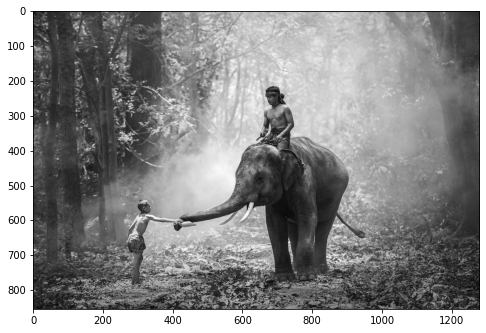

In [9]:
# 按 NORM_INF 缩放和位移
dst_NORM_INF = np.zeros(src.shape, dtype=np.float32)
cv2.normalize(src, dst=dst_NORM_INF, alpha=1.0, 
              beta=0, norm_type=cv2.NORM_INF)
print(dst_NORM_INF)

plt.figure(figsize=(8,10)) # 设置画布尺寸
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(np.uint8(dst_NORM_INF*255), cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

#### 5.3 NORM_L1 归一化

设数组中原有 ${A1,A2,A3...An}$：

$$
P=\frac{A_{i}}{\sum A_{i}}
$$

[[1.7279301e-07 1.8030576e-07 1.6528027e-07 ... 3.5309876e-07
  3.3807328e-07 3.2304780e-07]
 [2.2538219e-07 1.9533124e-07 1.8030576e-07 ... 3.5309876e-07
  3.3807328e-07 3.2304780e-07]
 [2.4040767e-07 1.7279301e-07 1.5776753e-07 ... 3.4558602e-07
  3.3807328e-07 3.2304780e-07]
 ...
 [3.0802232e-07 3.0802232e-07 2.9299684e-07 ... 4.1320069e-07
  4.5076439e-07 3.9817522e-07]
 [2.4792041e-07 2.4792041e-07 2.5543315e-07 ... 5.8599369e-07
  5.7096821e-07 4.7330261e-07]
 [2.7045863e-07 2.6294589e-07 2.7045863e-07 ... 6.0853193e-07
  5.7096821e-07 4.6578987e-07]]


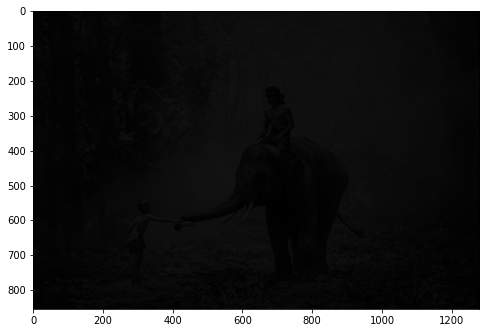

In [10]:
# 按 NORM_L1 缩放和位移
dst_NORM_L1 = np.zeros(src.shape, dtype=np.float32)
cv2.normalize(src, dst=dst_NORM_L1, alpha=1.0, 
              beta=0, norm_type=cv2.NORM_L1)
print(dst_NORM_L1)

plt.figure(figsize=(8,10)) # 设置画布尺寸
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(np.uint8(dst_NORM_L1*10000000), cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

#### 5.4 NORM_L2 归一化

设数组中原有 ${A1,A2,A3...An}$：

$$
P=\frac{A_{k}}{\sqrt{\sum\left(A_{i}\right)^{2}}}
$$

[[0.00016131 0.00016832 0.0001543  ... 0.00032963 0.00031561 0.00030158]
 [0.0002104  0.00018235 0.00016832 ... 0.00032963 0.00031561 0.00030158]
 [0.00022443 0.00016131 0.00014728 ... 0.00032262 0.00031561 0.00030158]
 ...
 [0.00028755 0.00028755 0.00027352 ... 0.00038574 0.00042081 0.00037171]
 [0.00023144 0.00023144 0.00023846 ... 0.00054705 0.00053302 0.00044185]
 [0.00025248 0.00024547 0.00025248 ... 0.00056809 0.00053302 0.00043483]]


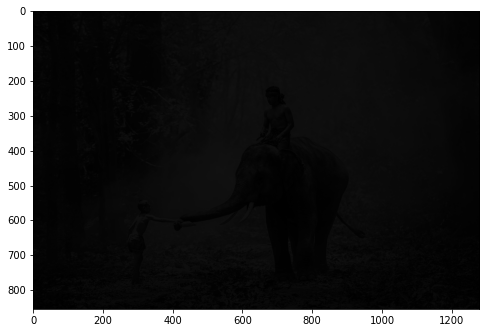

In [11]:
# 按 NORM_L2 缩放和位移
dst_NORM_L2 = np.zeros(src.shape, dtype=np.float32)
cv2.normalize(src, dst=dst_NORM_L2, alpha=1.0, 
              beta=0, norm_type=cv2.NORM_L2)
print(dst_NORM_L2)

plt.figure(figsize=(8,10)) # 设置画布尺寸
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(np.uint8(dst_NORM_L2*10000), cv2.COLOR_BGR2RGB)) 

# 显示图像
plt.show()

### 实验小结

在本实验中，你实现了对图像像素值进行基本统计与归一化操作。其中，

- `NORM_MINMAX` 归一化最为常用
- `NORM_L1`、`NORM_INF`、`NORM_L`2 模式下归一化结果与 `beta` 无关，只与 `alpha` 有关
- `NORM_MINMAX` 中 `alpha`、`beta` 都起作用，同时需要注意的是 `alpha` 和 `beta` 的取值顺序与归一化结果无关
  - 即 `alpha=255, beta=0` 和 `alpha=0, beta=255` 最后的归一化结果是相同的